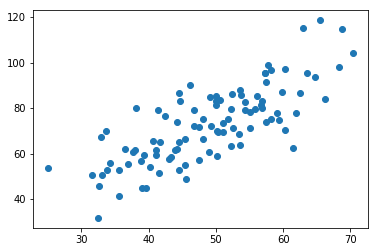

In [1]:
%matplotlib inline
import torch
from torch.autograd import Variable

import pandas as pd
import matplotlib.pyplot as plt

# Datatype for tensors
dtype = torch.FloatTensor

# Get data
data = pd.read_csv('data.csv', delimiter=',')
x_data = data['x'] 
y_data = data['y']

# Equation: y = wX + b
y = Variable(torch.Tensor(y_data).type(dtype), requires_grad=False)
X = Variable(torch.Tensor(x_data).type(dtype), requires_grad=False)

# Plot our data
plt.scatter(X.data.numpy(), y.data.numpy())

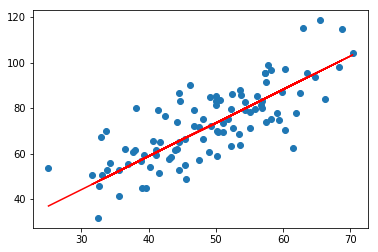

In [2]:
w = Variable(torch.zeros(1).type(dtype), requires_grad=True)
b = Variable(torch.zeros(1).type(dtype), requires_grad=True)

learning_rate = 1e-6

lst_w, lst_b = w, b
for itr in range(1000):
    pred_y = X.mul(w).add(b)  # y = wX + b
    loss = (y - pred_y).pow(2).mean()  # Mean squared error
    loss.backward()  # Compute gradients
    w.data -= learning_rate * w.grad.data  # Update weight, w
    b.data -= learning_rate * b.grad.data  # Update bias, b
    w.grad.data.zero_()  # Manually reset gradient buffers
    b.grad.data.zero_()
    lst_w, lst_b = w, b  # Get the last w and b value
    
y_points = lst_w.data.numpy() * X.data.numpy() + lst_b.data.numpy()  # Plot points

# Plot our data
plt.scatter(X.data.numpy(), y.data.numpy())
plt.plot(X.data.numpy(), y_points , 'r')